### Задача №7.

Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения медианой.


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import scipy.stats as stats
install `nbconvert[webpdf]`

In [10]:
data = pd.read_csv('/Users/da.karpov/Desktop/sberbank-russian-housing-market/train.csv')

In [29]:
data.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
8056,8059,2013-05-21,11,11.0,2.0,5.0,2.0,1907.0,1.0,12.0,...,339,135,26,133,207,1,89,161,10,2750000
8154,8157,2013-05-27,45,27.0,6.0,9.0,1.0,1970.0,2.0,6.0,...,2,1,0,3,8,1,0,19,3,7100000
8287,8290,2013-06-03,77,50.0,3.0,5.0,2.0,1957.0,3.0,8.0,...,214,85,21,48,89,1,54,146,12,11700000
8387,8390,2013-06-07,56,29.0,5.0,16.0,5.0,1987.0,2.0,10.0,...,74,32,8,19,34,0,10,121,7,10400000
8391,8394,2013-06-07,31,21.0,5.0,9.0,5.0,1962.0,1.0,5.0,...,99,43,8,17,41,1,18,93,5,6200000


In [11]:
data.isnull().sum()

id                       0
timestamp                0
full_sq                  0
life_sq               6383
floor                  167
                      ... 
mosque_count_5000        0
leisure_count_5000       0
sport_count_5000         0
market_count_5000        0
price_doc                0
Length: 292, dtype: int64

In [12]:
display(data.shape) 
display(data[["life_sq"]].describe())

(30471, 292)

,life_sq
count,24088.000000
mean,34.403271
std,52.285733
min,0.000000
25%,20.000000
50%,30.000000
75%,43.000000
max,7478.000000


In [14]:
from sklearn.impute import SimpleImputer

data["life_sq"] = SimpleImputer(strategy = "median").fit_transform(data[["life_sq"]])

display(data.shape) 
display(data[["life_sq"]].isnull().sum()) 
display(data[["life_sq"]].describe())

(30471, 292)

life_sq    0
dtype: int64

,life_sq
count,30471.000000
mean,33.480883
std,46.522251
min,0.000000
25%,22.000000
50%,30.000000
75%,38.000000
max,7478.000000


Выполнена импьютация медианным значением столбца life_sq. 
Форма не изменилась, число нулевых значений стало 0, среднее изменилось, медиана - нет.

## Задача No27

Для набора данных для одного (произвольного) числового признака проведите обнаружение и замену (найденными верхними и нижними границами) выбросов на основе 5% и 95% квантилей.

In [17]:
data = data.dropna(axis=0, how='any') 
display(data.shape) 
display(data.columns)

(6101, 292)

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=292)

In [18]:
data["floor"].head(20)

8056     2.0
8154     6.0
8287     3.0
8387     5.0
8391     5.0
8410     1.0
8423     9.0
8427     2.0
8452     4.0
8470     7.0
8499     2.0
8501     7.0
8519     2.0
8535     7.0
8563     5.0
8577     2.0
8590     3.0
8625    10.0
8639     8.0
8652     2.0
Name: floor, dtype: float64

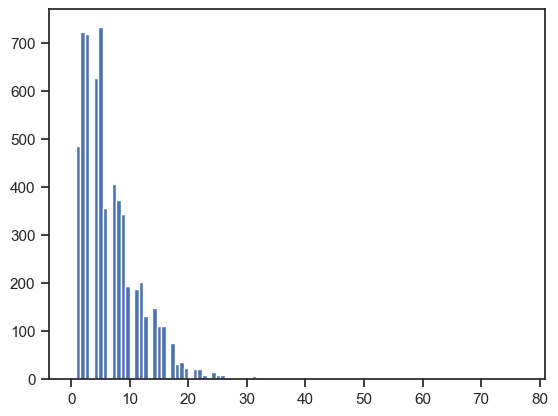

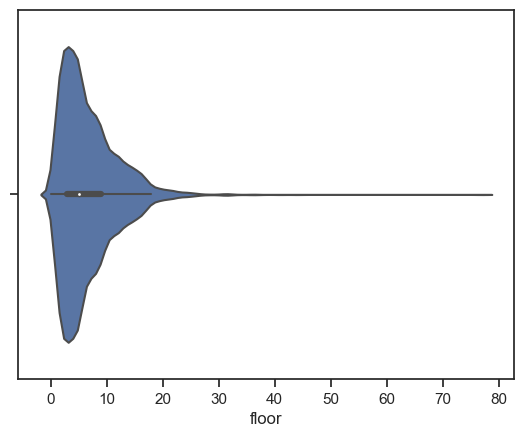

In [20]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.hist(data[["floor"]], 100) 
plt.show()
sns.violinplot(x=data["floor"]);

На гистограмме видны выбросы в районе 20, ≈ 30, ≈ 40, ≈ 50, ≈ 60, ≈ 70, ≈ 80

In [22]:
lower_boundary = data["floor"].quantile(0.05)
upper_boundary = data["floor"].quantile(0.95)

lower_boundary, upper_boundary

(1.0, 16.0)

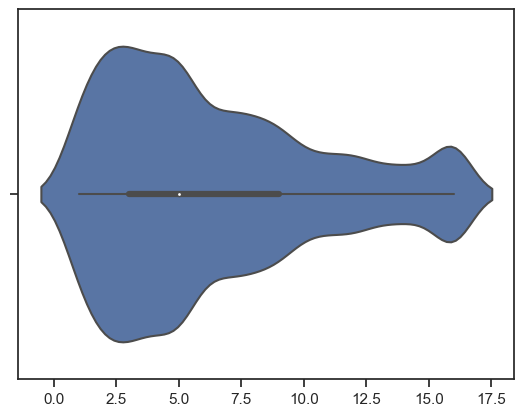

In [23]:
import numpy as np

replaced_bmi = np.where( 
    data["floor"] > upper_boundary,
    upper_boundary,
    np.where(
        data["floor"] < lower_boundary,
        lower_boundary,
        data["floor"],
    ) 
)

sns.violinplot(x = replaced_bmi);

Выбросы заменены

## Доп Задание

Для студентов групп ИУ5-21М, ИУ5И-21М, ИУ5Ц-21М - для пары произвольных колонок данных построить график "Диаграмма рассеяния".

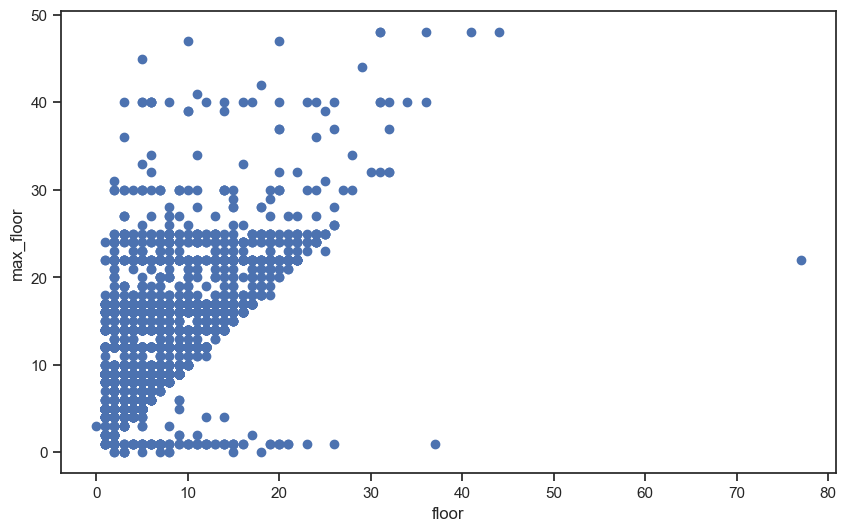

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data['floor'], y = data['max_floor'])
plt.xlabel("floor")
plt.ylabel("max_floor")

plt.show()